# List 4

** Exercise 1 **

In the 'Experience.CSV' file, the following variables referring to 50 US states are described: (i) State (state name),
(ii) pop (population estimated in July 1975), (iii) PERCAP (percapita income in 1974 in USD), (IV) Analf (proportion of illiterate in
1970), (V) Express (life expectancy in 1969-70), (VI) Crime (Crime Rate per 100000 inhabitants 1976), (VII) Study (percentage of students who complete the second degree 1970), (VIII) ndias (number of days of the year with temperature below Celsus in the most important city) and (ix) area (ix) area (ix) area (ix) area (ix) area (ix) area (ix) area. Make a cluster analysis with the Variables PERCAP, Analf, Crime, Studies, NDIAS, and dens, where dens = pop/area and make a box-plot of the expenditure variable with the generated groups.

In [2]:
import numpy as np
import pandas as pd

#
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#
from scipy.cluster.hierarchy import dendrogram, linkage

#
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [3]:
#
data = pd.read_csv("data/expecVida.csv")
data.head(n=5)

,estado,pop,percap,analf,expvida,crime,estud,ndias,area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [4]:
#
data.tail()

,estado,pop,percap,analf,expvida,crime,estud,ndias,area
45,Virginia,4981,4701,1.4,70.08,9.5,47.8,85,9267
46,Washington,3559,4864,0.6,71.72,4.3,63.5,32,39780
47,West-Virginia,1799,3617,1.4,69.48,6.7,41.6,100,24070
48,Wisconsin,4589,4468,0.7,72.48,3.0,54.5,149,54464
49,Wyoming,376,4566,0.6,70.29,6.9,62.9,173,97203


In [5]:
#
data.columns

Index(['estado', 'pop', 'percap', 'analf', 'expvida', 'crime', 'estud',
       'ndias', 'area'],
      dtype='object')

In [6]:
#
data.shape

(50, 9)

In [7]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   estado   50 non-null     object 
 1   pop      50 non-null     int64  
 2   percap   50 non-null     int64  
 3   analf    50 non-null     float64
 4   expvida  50 non-null     float64
 5   crime    50 non-null     float64
 6   estud    50 non-null     float64
 7   ndias    50 non-null     int64  
 8   area     50 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.6+ KB


<Axes: xlabel='expvida', ylabel='estado'>

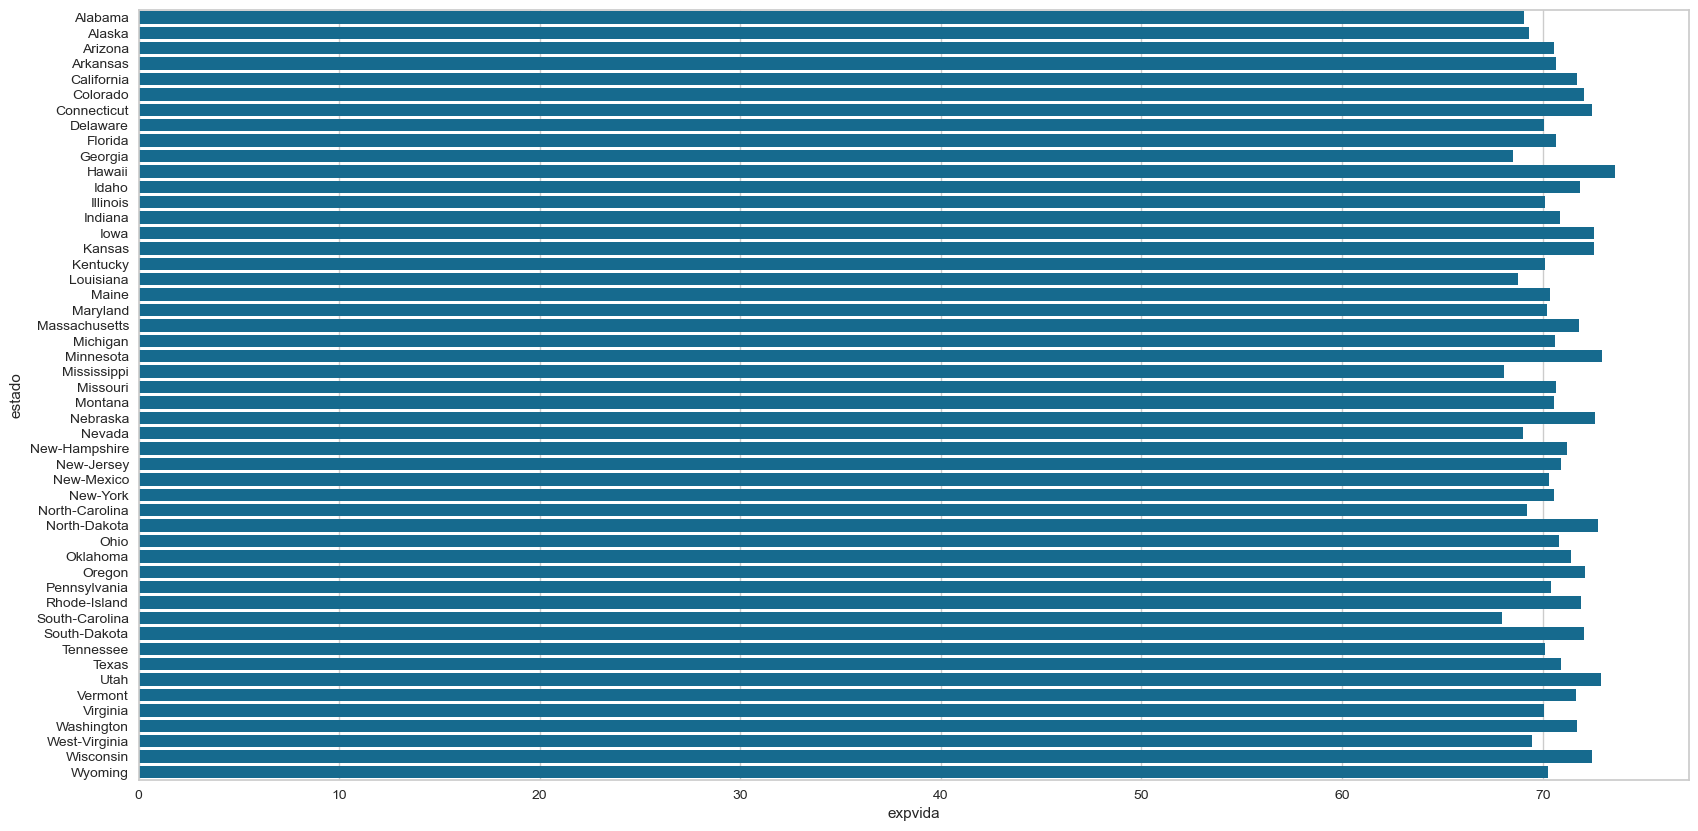

In [8]:
#
plt.figure(figsize=(20, 10)) 
sns.barplot(x="expvida", y="estado", data=data)

<Axes: xlabel='pop', ylabel='estado'>

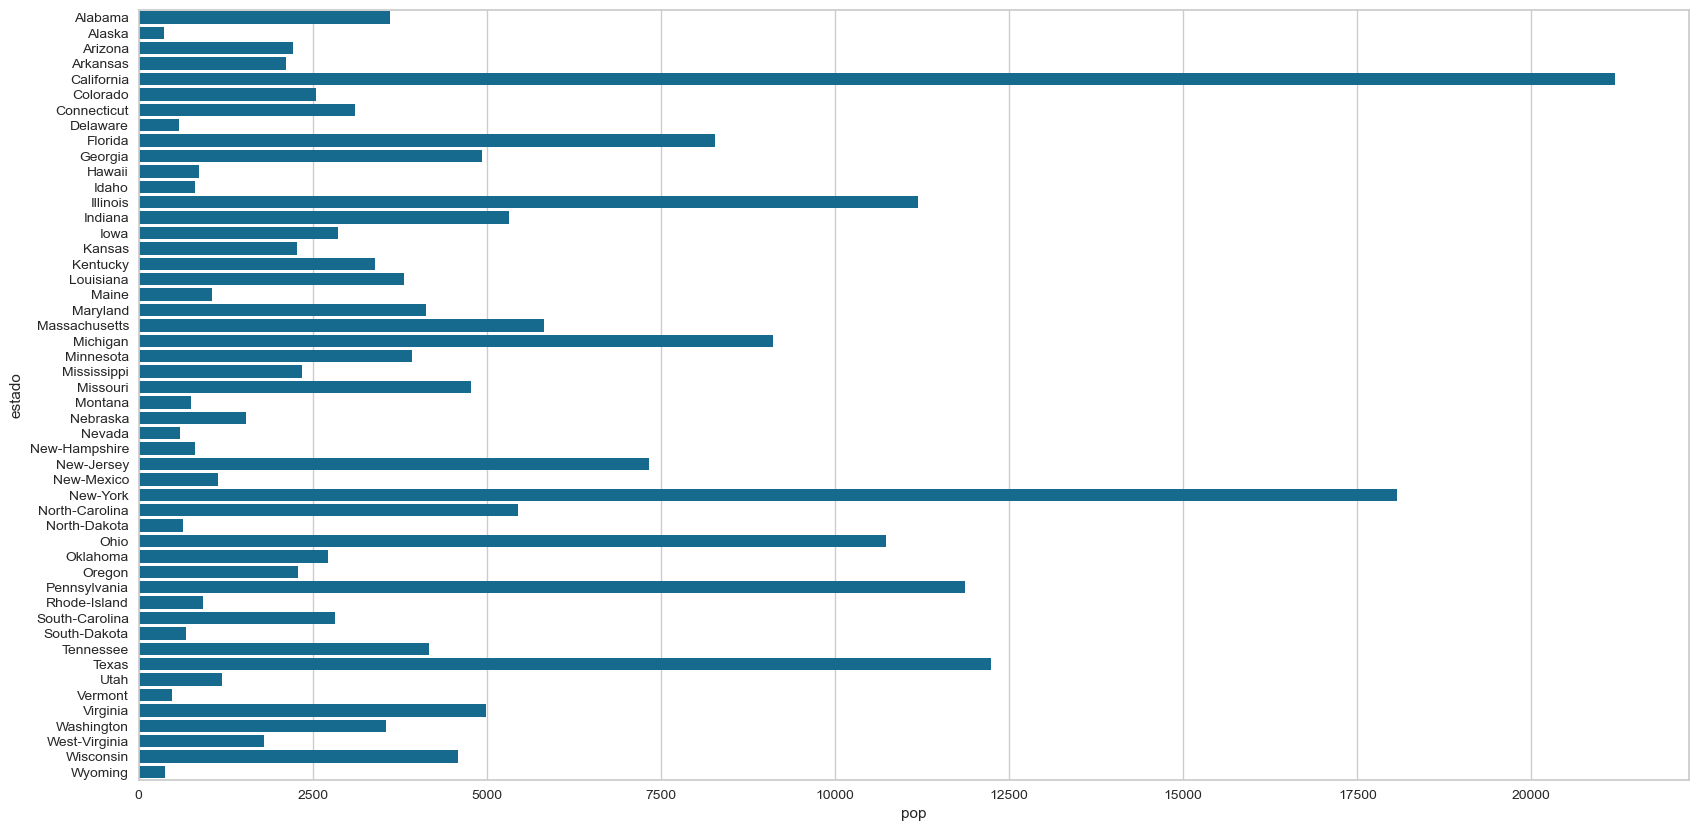

In [9]:
#
plt.figure(figsize=(20, 10)) 
sns.barplot(x="pop", y="estado", data=data)

In [11]:
# X
data['dens'] = data['pop'] / data['area']

# y
cluster_vars = ['percap', 'analf', 'crime', 'estud', 'ndias', 'dens']

# Cluster
x = data[cluster_vars]

C:\Users\rafae\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rafae\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rafae\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rafae\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rafae\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

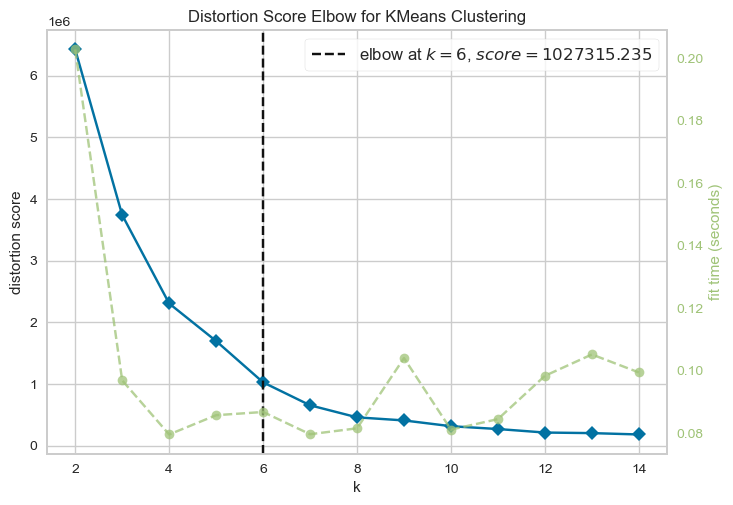

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Finding the cluster value

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clusterer (in this case, kmeans)
clusterer = KMeans()

# Create the Elbow viewer, testing from 2 to 15 clusters
visualizer = KElbowVisualizer(clusterer, k=(2,15))

# Adjust the viewer to the dataset
visualizer.fit(x)

# Display the chart
visualizer.show()

In [13]:
# Cluster Model

#
modelo_cluster = KMeans(n_clusters=6, random_state=0)

#
modelo_cluster_fit = modelo_cluster.fit(x)

#
modelo_cluster

C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [14]:
# Calculating the quality of the segmentation
betweenss = modelo_cluster.inertia_ # soma dos quadrados entre os clusters

# Calculating the global average
global_mean = np.mean(x.values, axis=0) # Use .values para

# Total Sum of Square (Total SS)
totss = np.sum(np.linalg.norm(x.values - global_mean, axis=1)**2)

# Quality
quality = betweenss / totss if totss != 0 else 0 # Para evitar

#Division by zero
print(f'Betweenness (Between SS): {betweenss}')
print(f'Total SS: {totss}')
print(f'Quality: {quality}')

Betweenness (Between SS): 891660.4454937824
Total SS: 18637381.342526194
Quality: 0.04784258201870987


In [15]:
data['cluster'] = modelo_cluster.fit_predict(x)
data.head(n=5)

C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,estado,pop,percap,analf,expvida,crime,estud,ndias,area,dens,cluster
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,0.071291,1
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,0.000644,5
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,0.019503,2
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,0.040620,1
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,0.135571,4


In [16]:
# cluster centers
modelo_cluster.cluster_centers_

array([[4.82722222e+03, 1.13333333e+00, 7.66666667e+00, 5.64777778e+01,
        7.85555556e+01, 2.44880553e-01],
       [3.57250000e+03, 1.91000000e+00, 1.03200000e+01, 4.34000000e+01,
        7.58000000e+01, 3.20757968e-01],
       [4.54438462e+03, 8.00000000e-01, 4.76153846e+00, 5.64000000e+01,
        1.22153846e+02, 6.58211672e-02],
       [4.08870000e+03, 1.09000000e+00, 7.32000000e+00, 5.21700000e+01,
        1.14200000e+02, 6.89812649e-02],
       [5.19157143e+03, 9.14285714e-01, 7.18571429e+00, 5.59285714e+01,
        1.25142857e+02, 3.48553178e-01],
       [6.31500000e+03, 1.50000000e+00, 1.13000000e+01, 6.67000000e+01,
        1.52000000e+02, 6.44384498e-04]])

In [17]:
# Euclidean Distance
sil_score = silhouette_score(x, data.cluster)
sil_score = silhouette_score(x, data.cluster, metric='euclidean') 
print(f"Silhouette Score: {sil_score:.4f}")
print()
print(f"Silhouette Score with Euclidean Distance: {sil_score:.4f}")

Silhouette Score: 0.4854

Silhouette Score with Euclidean Distance: 0.4854


<Figure size 1000x600 with 0 Axes>

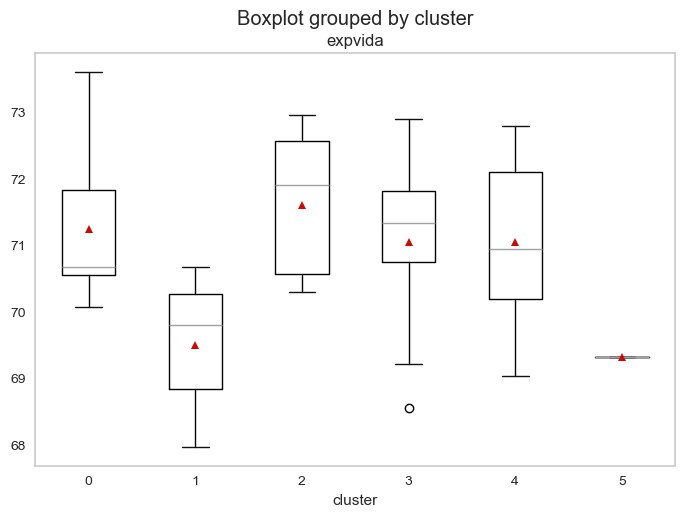

In [18]:
# Clusters
plt.figure(figsize=(10, 6))
data.boxplot(column='expvida', by='cluster', grid=False, showmeans=True)

plt.show()

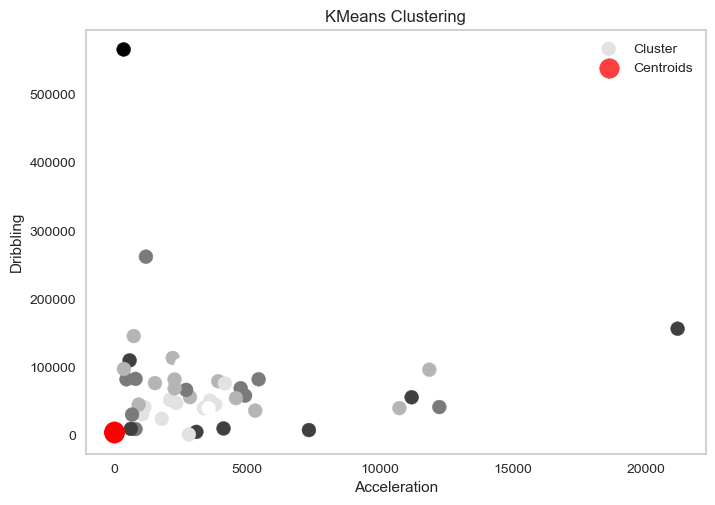

In [19]:
plt.scatter(data['pop'], data['area'], c=modelo_cluster.labels_, s=100)
plt.scatter(modelo_cluster.cluster_centers_[:, 1], 
            modelo_cluster.cluster_centers_[:, 0], 
            c='red', 
            s=200, 
            alpha=0.75)
plt.ylabel('Dribbling')
plt.xlabel('Acceleration')
plt.title('KMeans Clustering')
plt.legend(["Cluster", "Centroids"])
plt.grid(False)
plt.show()